# scikit-FIBERS Evaluation Code

## Installation and Imports 
How to setup and use scikit-FIBERS

In [1]:
import pandas as pd
from skfibers import FIBERS
from sklearn.metrics import classification_report
from lifelines import CoxPHFitter

## Running Evaluation

In [2]:
raw_data = pd.read_csv('Data1.csv')
print(raw_data.columns)
raw_data.head(10)

/var/folders/p0/smypln156vjfpjvdmm61f9f00000gv/T/ipykernel_70825/2078303436.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('Data1.csv')


Index(['PX_ID', 'ORG_TY', 'DON_TY', 'DON_AGE', 'CAN_GENDER', 'CAN_RACE',
       'CAN_ABO', 'REC_TX_ORG_TY', 'REC_AGE_AT_TX', 'CAN_SOURCE',
       ...
       'DRB192', 'DRB193', 'DRB194', '_imputation_', 'mmC0', 'mmC1', 'mmDQ0',
       'mmDQ1', 'FIRST_TX', 'MOST_RECENT_TX'],
      dtype='object', length=865)


,PX_ID,ORG_TY,DON_TY,DON_AGE,CAN_GENDER,CAN_RACE,CAN_ABO,REC_TX_ORG_TY,REC_AGE_AT_TX,CAN_SOURCE,...,DRB192,DRB193,DRB194,_imputation_,mmC0,mmC1,mmDQ0,mmDQ1,FIRST_TX,MOST_RECENT_TX
0,-1903455,KI: Kidney,C,47,F,8: White,O: O,KI: Kidney,35-49,NaN,...,0,0,0,1,0,1,0,1,0,1
1,17,KI: Kidney,C,38,M,2000: Hispanic/Latino,O: O,KI: Kidney,35-49,R,...,0,0,0,1,1,0,0,0,1,1
2,27,KI: Kidney,C,65,F,16: Black or African American,O: O,KI: Kidney,35-49,R,...,0,0,0,1,0,0,1,0,1,1
3,36,KI: Kidney,C,44,M,16: Black or African American,A: A,KI: Kidney,50-64,R,...,0,0,0,1,0,0,0,0,0,1
4,45,KI: Kidney,C,52,M,8: White,O: O,KI: Kidney,65+,R,...,0,0,0,1,0,0,0,0,1,1
5,58,KI: Kidney,C,36,M,8: White,O: O,KI: Kidney,35-49,R,...,0,0,0,1,0,0,0,0,1,1
6,60,KI: Kidney,C,32,F,8: White,O: O,KI: Kidney,65+,R,...,0,0,0,1,0,0,0,0,1,1
7,61,KI: Kidney,C,49,M,8: White,A: A,KI: Kidney,18-34,R,...,0,0,0,1,0,0,0,0,0,1
8,65,KI: Kidney,C,46,F,16: Black or African American,O: O,KI: Kidney,35-49,R,...,0,0,0,1,0,0,1,0,0,1
9,80,KI: Kidney,C,17,M,8: White,O: O,KI: Kidney,35-49,R,...,0,0,0,1,0,0,1,0,0,1


In [3]:
# Setting and loading data with features
amino_acids = ['A1', 'A10', 'A100', 'A101', 'A102', 'A103', 'A104', 'A105', 'A106', 'A107', 'A108', 'A109', 'A11', 'A110', 'A111', 'A112', 'A113', 'A114', 'A115', 'A116', 'A117', 'A118', 'A119', 'A12', 'A120', 'A121', 'A122', 'A123', 'A124', 'A125', 'A126', 'A127', 'A128', 'A129', 'A13', 'A130', 'A131', 'A132', 'A133', 'A134', 'A135', 'A136', 'A137', 'A138', 'A139', 'A14', 'A140', 'A141', 'A142', 'A143', 'A144', 'A145', 'A146', 'A147', 'A148', 'A149', 'A15', 'A150', 'A151', 'A152', 'A153', 'A154', 'A155', 'A156', 'A157', 'A158', 'A159', 'A16', 'A160', 'A161', 'A162', 'A163', 'A164', 'A165', 'A166', 'A167', 'A168', 'A169', 'A17', 'A170', 'A171', 'A172', 'A173', 'A174', 'A175', 'A176', 'A177', 'A178', 'A179', 'A18', 'A180', 'A181', 'A182', 'A183', 'A184', 'A185', 'A186', 'A187', 'A188', 'A189', 'A19', 'A190', 'A191', 'A192', 'A193', 'A194', 'A195', 'A196', 'A197', 'A198', 'A199', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A3', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A4', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A5', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A6', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A7', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A8', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A9', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'B1', 'B10', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B11', 'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117', 'B118', 'B119', 'B12', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B128', 'B129', 'B13', 'B130', 'B131', 'B132', 'B133', 'B134', 'B135', 'B136', 'B137', 'B138', 'B139', 'B14', 'B140', 'B141', 'B142', 'B143', 'B144', 'B145', 'B146', 'B147', 'B148', 'B149', 'B15', 'B150', 'B151', 'B152', 'B153', 'B154', 'B155', 'B156', 'B157', 'B158', 'B159', 'B16', 'B160', 'B161', 'B162', 'B163', 'B164', 'B165', 'B166', 'B167', 'B168', 'B169', 'B17', 'B170', 'B171', 'B172', 'B173', 'B174', 'B175', 'B176', 'B177', 'B178', 'B179', 'B18', 'B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187', 'B188', 'B189', 'B19', 'B190', 'B191', 'B192', 'B193', 'B194', 'B2', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B5', 'B50', 'B51', 'B52', 'B53', 'B54', 'B55', 'B56', 'B57', 'B58', 'B59', 'B6', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69', 'B7', 'B70', 'B71', 'B72', 'B73', 'B74', 'B75', 'B76', 'B77', 'B78', 'B79', 'B8', 'B80', 'B81', 'B82', 'B83', 'B84', 'B85', 'B86', 'B87', 'B88', 'B89', 'B9', 'B90', 'B91', 'B92', 'B93', 'B94', 'B95', 'B96', 'B97', 'B98', 'B99', 'C1', 'C10', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C11', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C12', 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C13', 'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136', 'C137', 'C138', 'C139', 'C14', 'C140', 'C141', 'C142', 'C143', 'C144', 'C145', 'C146', 'C147', 'C148', 'C149', 'C15', 'C150', 'C151', 'C152', 'C153', 'C154', 'C155', 'C156', 'C157', 'C158', 'C159', 'C16', 'C160', 'C161', 'C162', 'C163', 'C164', 'C165', 'C166', 'C167', 'C168', 'C169', 'C17', 'C170', 'C171', 'C172', 'C173', 'C174', 'C175', 'C176', 'C177', 'C178', 'C179', 'C18', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'C189', 'C19', 'C190', 'C191', 'C192', 'C193', 'C194', 'C195', 'C196', 'C197', 'C198', 'C199', 'C2', 'C20', 'C200', 'C201', 'C202', 'C203', 'C204', 'C205', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C5', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C6', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C7', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C8', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C9', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99', 'DQB11', 'DQB110', 'DQB111', 'DQB112', 'DQB113', 'DQB114', 'DQB115', 'DQB116', 'DQB117', 'DQB118', 'DQB119', 'DQB12', 'DQB120', 'DQB121', 'DQB122', 'DQB123', 'DQB124', 'DQB125', 'DQB126', 'DQB127', 'DQB128', 'DQB129', 'DQB13', 'DQB130', 'DQB131', 'DQB132', 'DQB133', 'DQB134', 'DQB135', 'DQB136', 'DQB137', 'DQB138', 'DQB139', 'DQB14', 'DQB140', 'DQB141', 'DQB142', 'DQB143', 'DQB144', 'DQB145', 'DQB146', 'DQB147', 'DQB148', 'DQB149', 'DQB15', 'DQB150', 'DQB151', 'DQB152', 'DQB153', 'DQB154', 'DQB155', 'DQB156', 'DQB157', 'DQB158', 'DQB159', 'DQB16', 'DQB160', 'DQB161', 'DQB162', 'DQB163', 'DQB164', 'DQB165', 'DQB166', 'DQB167', 'DQB168', 'DQB169', 'DQB17', 'DQB170', 'DQB171', 'DQB172', 'DQB173', 'DQB174', 'DQB175', 'DQB176', 'DQB177', 'DQB178', 'DQB179', 'DQB18', 'DQB180', 'DQB181', 'DQB182', 'DQB183', 'DQB184', 'DQB185', 'DQB186', 'DQB187', 'DQB188', 'DQB189', 'DQB19', 'DQB190', 'DQB191', 'DQB192', 'DQB193', 'DQB194', 'DRB11', 'DRB110', 'DRB111', 'DRB112', 'DRB113', 'DRB114', 'DRB115', 'DRB116', 'DRB117', 'DRB118', 'DRB119', 'DRB12', 'DRB120', 'DRB121', 'DRB122', 'DRB123', 'DRB124', 'DRB125', 'DRB126', 'DRB127', 'DRB128', 'DRB129', 'DRB13', 'DRB130', 'DRB131', 'DRB132', 'DRB133', 'DRB134', 'DRB135', 'DRB136', 'DRB137', 'DRB138', 'DRB139', 'DRB14', 'DRB140', 'DRB141', 'DRB142', 'DRB143', 'DRB144', 'DRB145', 'DRB146', 'DRB147', 'DRB148', 'DRB149', 'DRB15', 'DRB150', 'DRB151', 'DRB152', 'DRB153', 'DRB154', 'DRB155', 'DRB156', 'DRB157', 'DRB158', 'DRB159', 'DRB16', 'DRB160', 'DRB161', 'DRB162', 'DRB163', 'DRB164', 'DRB165', 'DRB166', 'DRB167', 'DRB168', 'DRB169', 'DRB17', 'DRB170', 'DRB171', 'DRB172', 'DRB173', 'DRB174', 'DRB175', 'DRB176', 'DRB177', 'DRB178', 'DRB179', 'DRB18', 'DRB180', 'DRB181', 'DRB182', 'DRB183', 'DRB184', 'DRB185', 'DRB186', 'DRB187', 'DRB188', 'DRB189', 'DRB19', 'DRB190', 'DRB191', 'DRB192', 'DRB193', 'DRB194']
covariates = ['shared', 'DCD', 'DON_AGE', 'donage_slope_ge18', 'dcadcodanox', 
              'dcadcodcva', 'dcadcodcnst', 'dcadcodoth', 'don_cmv_negative', 
              'don_htn_0c', 'ln_don_wgt_kg_0c', 'ln_don_wgt_kg_0c_s55', 
              'don_ecd', 'age_ecd', 'yearslice', 'REC_AGE_AT_TX', 
              'rec_age_spline_35', 'rec_age_spline_50', 'rec_age_spline_65', 
              'diab_noted', 'age_diab', 'dm_can_age_spline_50', 
              'can_dgn_htn_ndm', 'can_dgn_pk_ndm', 'can_dgn_gd_ndm', 
              'rec_prev_ki_tx', 'rec_prev_ki_tx_dm', 'rbmi_0c', 'rbmi_miss', 
              'rbmi_gt_20', 'rbmi_DM', 'rbmi_gt_20_DM', 'ln_c_hd_m', 
              'ln_c_hd_0c', 'ln_c_hd_m_ptx', 'PKPRA_MS', 'PKPRA_1080', 
              'PKPRA_GE80', 'hispanic', 'CAN_RACE_BLACK', 'CAN_RACE_asian', 
              'CAN_RACE_WHITE', 'mm0', 'mmDR0', 'mmDR1', 'mmA0', 'mmA1', 
              'mmB0', 'mmB1', 'mmC0', 'mmC1', 'mmDQ0', 'mmDQ1']
features = amino_acids + covariates + ["grf_fail",] + ["graftyrs",]
data = raw_data[features]

# Droping Rows with NaN values
nan_values = data[pd.isnull(data).any(axis=1)]
data_without_nan = data.dropna()

# Label Encoding Values
cat_columns = data_without_nan.select_dtypes(['object']).columns
data_without_nan[cat_columns] = data_without_nan[cat_columns].apply(lambda x: pd.factorize(x)[0])

grf_fail = data_without_nan[['grf_fail']]
# data_without_nan = data_without_nan.drop('grf_fail', axis=1)

In [4]:
data_without_nan.head(10)

,A1,A10,A100,A101,A102,A103,A104,A105,A106,A107,...,mmA0,mmA1,mmB0,mmB1,mmC0,mmC1,mmDQ0,mmDQ1,grf_fail,graftyrs
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,3.233490
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,16.003176
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,17.002519
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1.319680
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,6.349250
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,11.904501
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,15.003833
7,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,15.003833
8,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,4.191764
9,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0.632461


In [5]:
# data_without_nan.describe()

## Fitting FIBERS on the Data

/Users/harshbandhey/Local/Cedars/Urbslab/scikit-FIBERS/src/skfibers/methods/algorithms.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_matrix_no_empty_variables[label_name] = original_feature_matrix[label_name]
/Users/harshbandhey/Local/Cedars/Urbslab/scikit-FIBERS/src/skfibers/methods/algorithms.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_matrix_no_empty_variables[duration_name] = original_feature_matrix[duration_name]


Fitting COX Model
Iteration 1: norm_delta = 0.41245, step_size = 0.9500, log_lik = -674771.34752, newton_decrement = 6260.12204, seconds_since_start = 2.6
Iteration 2: norm_delta = 0.10122, step_size = 0.9500, log_lik = -668761.46065, newton_decrement = 134.96488, seconds_since_start = 3.4
Iteration 3: norm_delta = 0.00876, step_size = 0.9500, log_lik = -668624.19835, newton_decrement = 1.02924, seconds_since_start = 4.3
Iteration 4: norm_delta = 0.00004, step_size = 1.0000, log_lik = -668623.16557, newton_decrement = 0.00003, seconds_since_start = 5.1
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, log_lik = -668623.16554, newton_decrement = 0.00000, seconds_since_start = 6.0
Convergence success after 5 iterations.


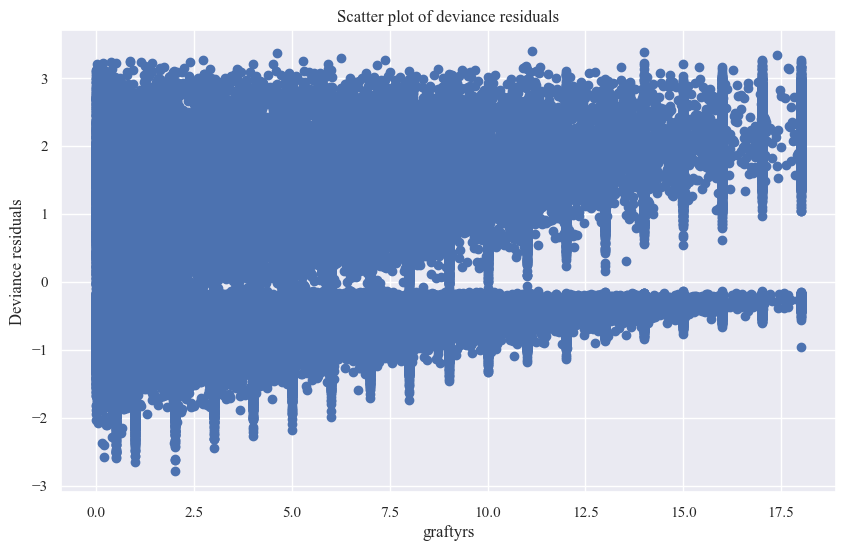

100%|█████████████████████████████████████████| 100/100 [04:18<00:00,  2.58s/it]


In [6]:
fibers = FIBERS(label_name="grf_fail", duration_name="graftyrs", 
                given_starting_point=False, amino_acid_start_point=None,
                amino_acid_bins_start_point=None, iterations=100, 
                set_number_of_bins=50, min_features_per_group=2,
                max_number_of_groups_with_feature=2, 
                informative_cutoff=0.2, crossover_probability=0.8,
                mutation_probability=0.4, elitism_parameter=0.8,
                random_seed=42,method="Residuals", covariates=covariates) # method = None and covariates = None
fibers = fibers.fit(data_without_nan)


In [11]:
def hazard_ratio(data_without_nan, bin_scores, bins, covariates, index=0):
    sorted_bin_scores = dict(sorted(bin_scores.items(), key=lambda item: item[1], reverse=True))
    sorted_bin_list = list(sorted_bin_scores.keys())
    sorted_bin_feature_importance_values = list(sorted_bin_scores.values())
    Bin = bins[sorted_bin_list[index]]
    d_data = data_without_nan.copy()
    d_data['Bin'] = d_data[Bin].sum(axis=1)
    column_values = d_data['Bin'].to_list()
    for r in range(0, len(column_values)):
        if column_values[r] > 0:
            column_values[r] = 1
    d_data['Bin'] = column_values
    coxmodeldata =  d_data[covariates + ["grf_fail", "graftyrs", "Bin"]]
    cat_columns = coxmodeldata.select_dtypes(['object']).columns
    coxmodeldata[cat_columns] = coxmodeldata[cat_columns].apply(lambda x: pd.factorize(x)[0])
    cph = CoxPHFitter()
    cph.fit(coxmodeldata,"graftyrs",event_col="grf_fail", show_progress=True)
    return cph.summary

In [12]:
summary = hazard_ratio(data_without_nan, fibers.bin_scores, fibers.bins, covariates, index=0)
summary

Iteration 1: norm_delta = 0.68957, step_size = 0.9500, log_lik = -674771.34752, newton_decrement = 6435.34737, seconds_since_start = 0.9
Iteration 2: norm_delta = 0.19334, step_size = 0.9500, log_lik = -668578.29769, newton_decrement = 148.57093, seconds_since_start = 1.9
Iteration 3: norm_delta = 0.02002, step_size = 0.9500, log_lik = -668426.79239, newton_decrement = 1.29359, seconds_since_start = 2.8
Iteration 4: norm_delta = 0.00013, step_size = 1.0000, log_lik = -668425.49316, newton_decrement = 0.00007, seconds_since_start = 3.6
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, log_lik = -668425.49309, newton_decrement = 0.00000, seconds_since_start = 4.5
Convergence success after 5 iterations.


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
shared,0.108660,1.114783,0.010199,0.088670,0.128649,1.092720,1.137291,0.0,10.653922,1.671695e-26,85.628819
DCD,0.078785,1.081972,0.014360,0.050640,0.106930,1.051944,1.112856,0.0,5.486439,4.101170e-08,24.539389
DON_AGE,-0.010670,0.989386,0.004818,-0.020112,-0.001228,0.980088,0.998773,0.0,-2.214905,2.676661e-02,5.223422
donage_slope_ge18,0.020321,1.020529,0.004956,0.010608,0.030035,1.010665,1.030490,0.0,4.100480,4.122933e-05,14.565970
dcadcodanox,0.043663,1.044630,0.012458,0.019247,0.068080,1.019433,1.070451,0.0,3.504919,4.567462e-04,11.096320
dcadcodcva,0.068541,1.070945,0.010873,0.047231,0.089852,1.048364,1.094012,0.0,6.303889,2.902692e-10,31.681889
dcadcodcnst,-0.000632,0.999368,0.051353,-0.101282,0.100018,0.903678,1.105191,0.0,-0.012308,9.901802e-01,0.014237
dcadcodoth,0.060543,1.062414,0.027604,0.006440,0.114647,1.006461,1.121477,0.0,2.193258,2.828877e-02,5.143627
don_cmv_negative,-0.011864,0.988206,0.008647,-0.028813,0.005084,0.971598,1.005097,0.0,-1.372000,1.700633e-01,2.555856


## Accessing results and internal functions

### Summary of Top Bin Statistics

In [ ]:
bin_summary, logrank_results = fibers.get_bin_summary()
logrank_results

### All Bins and coressponding Log-Rank Scores

In [ ]:
fibers.get_bin_scores().head(10)

### Viewing Kaplan Meier Survival Plot

In [ ]:
fibers.get_bin_survival_plot(show=True)

### Viewing Transformed Rules/Bins/Features

In [ ]:
data_tranformed = fibers.transform(data_without_nan)
data_tranformed

### Checking Top Rule Train Accuracy

In [ ]:
print("Accuracy: ", fibers.score(data_without_nan, grf_fail))

In [ ]:
y = fibers.predict(data_without_nan)

In [ ]:
print(classification_report(y, grf_fail))